<a href="https://colab.research.google.com/github/terrainthesky-hub/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-backpropagation/Lesley_RichLS_DS_432_TensorFlow_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 2*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [21]:
import os
import numpy as np
data = np.load('./sample_data/quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [18]:
data.files
#last % of dataset .2
#

['arr_0', 'arr_1']

In [22]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

Exception ignored in: <bound method NpzFile.__del__ of <numpy.lib.npyio.NpzFile object at 0x7f33b5b4aef0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py", line 230, in __del__
    self.close()
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py", line 221, in close
    if self.zip is not None:
AttributeError: 'NpzFile' object has no attribute 'zip'


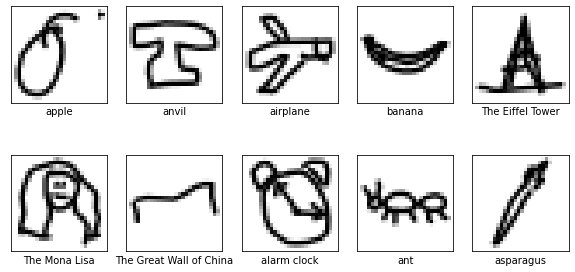

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* The default batchsize should be fine for this exercise.
* Limit your model epochs to 30 each time you fit.



In [24]:
from sklearn.utils import shuffle
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

X, y = shuffle(X, y)


In [25]:
sgd = SGD(learning_rate=0.01)

model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'),
                    Dense(5, activation='sigmoid'),
                    Dense(10, activation='softmax')
])

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

sgd_default = model.fit(X,y, epochs=30, validation_split=.2, shuffle=True)

Epoch 1/30
2500/2500 [==============================] - 7s 3ms/step - loss: 2.2866 - accuracy: 0.1525 - val_loss: 2.2665 - val_accuracy: 0.2499
Epoch 2/30
2500/2500 [==============================] - 7s 3ms/step - loss: 2.2339 - accuracy: 0.2077 - val_loss: 2.1896 - val_accuracy: 0.2375
Epoch 3/30
2500/2500 [==============================] - 7s 3ms/step - loss: 2.1240 - accuracy: 0.2186 - val_loss: 2.0601 - val_accuracy: 0.1978
Epoch 4/30
2500/2500 [==============================] - 7s 3ms/step - loss: 2.0160 - accuracy: 0.2107 - val_loss: 1.9807 - val_accuracy: 0.2008
Epoch 5/30
2500/2500 [==============================] - 7s 3ms/step - loss: 1.9587 - accuracy: 0.2292 - val_loss: 1.9496 - val_accuracy: 0.2211
Epoch 6/30
2500/2500 [==============================] - 7s 3ms/step - loss: 1.9598 - accuracy: 0.2612 - val_loss: 1.9506 - val_accuracy: 0.2675
Epoch 7/30
2500/2500 [==============================] - 7s 3ms/step - loss: 1.9324 - accuracy: 0.2749 - val_loss: 1.9215 - val_accuracy:

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [26]:



sgd = SGD(learning_rate=0.01)

model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'),
                    Dense(5, activation='sigmoid'),
                    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

adam_default = model.fit(X,y, epochs=30, validation_split=.2, shuffle=True)

Epoch 1/30
2500/2500 [==============================] - 8s 3ms/step - loss: 2.0763 - accuracy: 0.2830 - val_loss: 1.7759 - val_accuracy: 0.3586
Epoch 2/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.6933 - accuracy: 0.3738 - val_loss: 1.6654 - val_accuracy: 0.3713
Epoch 3/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.6145 - accuracy: 0.3997 - val_loss: 1.5898 - val_accuracy: 0.4117
Epoch 4/30
2500/2500 [==============================] - 9s 3ms/step - loss: 1.5721 - accuracy: 0.4255 - val_loss: 1.5657 - val_accuracy: 0.4288
Epoch 5/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.5624 - accuracy: 0.4308 - val_loss: 1.5666 - val_accuracy: 0.4062
Epoch 6/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.5270 - accuracy: 0.4394 - val_loss: 1.5178 - val_accuracy: 0.4214
Epoch 7/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.4921 - accuracy: 0.4584 - val_loss: 1.5375 - val_accuracy:

## Optimize Learning Rate
Using the optimizer your picked in the previous step, begin tuning the learning rate within that optimizer. Try manually choosing 3-5 learning rate.values. 


In [40]:
from tensorflow import keras

opt = keras.optimizers.Adam(learning_rate=0.001)

model = Sequential([
                    Dense(10, activation='sigmoid', input_dim=784),
                    Dense(10, activation='sigmoid'),
                    Dense(10, activation='sigmoid'),
                    Dense(10, activation='sigmoid'),
                    Dense(10, activation='softmax')
])

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

adam_low = model.fit(X,y, epochs=30, validation_split=.2, shuffle=True)

Epoch 1/30
2500/2500 [==============================] - 8s 3ms/step - loss: 2.0627 - accuracy: 0.2107 - val_loss: 1.9035 - val_accuracy: 0.3141
Epoch 2/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.7547 - accuracy: 0.3446 - val_loss: 1.6446 - val_accuracy: 0.3869
Epoch 3/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.5686 - accuracy: 0.4340 - val_loss: 1.5060 - val_accuracy: 0.4807
Epoch 4/30
2500/2500 [==============================] - 9s 4ms/step - loss: 1.4373 - accuracy: 0.5035 - val_loss: 1.3803 - val_accuracy: 0.5009
Epoch 5/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.3594 - accuracy: 0.5190 - val_loss: 1.3563 - val_accuracy: 0.5097
Epoch 6/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.3390 - accuracy: 0.5320 - val_loss: 1.3385 - val_accuracy: 0.5390
Epoch 7/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.2962 - accuracy: 0.5641 - val_loss: 1.2795 - val_accuracy:

Exception ignored in: <bound method NpzFile.__del__ of <numpy.lib.npyio.NpzFile object at 0x7f33b598b198>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py", line 230, in __del__
    self.close()
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py", line 221, in close
    if self.zip is not None:
AttributeError: 'NpzFile' object has no attribute 'zip'


2500/2500 [==============================] - 8s 3ms/step - loss: 1.1325 - accuracy: 0.6216 - val_loss: 1.1128 - val_accuracy: 0.6450
Epoch 19/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.0917 - accuracy: 0.6475 - val_loss: 1.0904 - val_accuracy: 0.6521
Epoch 20/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.0981 - accuracy: 0.6421 - val_loss: 1.1069 - val_accuracy: 0.6426
Epoch 21/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.0827 - accuracy: 0.6530 - val_loss: 1.0867 - val_accuracy: 0.6542
Epoch 22/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.0728 - accuracy: 0.6539 - val_loss: 1.0731 - val_accuracy: 0.6575
Epoch 23/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.0766 - accuracy: 0.6582 - val_loss: 1.1044 - val_accuracy: 0.6460
Epoch 24/30
2500/2500 [==============================] - 8s 3ms/step - loss: 1.0879 - accuracy: 0.6475 - val_loss: 1.0815 - val_accuracy: 0.65

In [30]:

opt = keras.optimizers.Adam(learning_rate=0.02)

model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'),
                    Dense(5, activation='sigmoid'),
                    Dense(10, activation='softmax')
])

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

adam_high = model.fit(X,y, epochs=30, validation_split=.2, shuffle=True)

Epoch 1/30
2500/2500 [==============================] - 8s 3ms/step - loss: 2.2309 - accuracy: 0.1314 - val_loss: 2.1777 - val_accuracy: 0.1636
Epoch 2/30
2500/2500 [==============================] - 8s 3ms/step - loss: 2.1375 - accuracy: 0.1711 - val_loss: 2.0678 - val_accuracy: 0.1720
Epoch 3/30
2500/2500 [==============================] - 8s 3ms/step - loss: 2.0850 - accuracy: 0.1834 - val_loss: 2.1367 - val_accuracy: 0.1822
Epoch 4/30
2500/2500 [==============================] - 8s 3ms/step - loss: 2.0972 - accuracy: 0.1847 - val_loss: 2.0844 - val_accuracy: 0.1787
Epoch 5/30
2500/2500 [==============================] - 8s 3ms/step - loss: 2.0455 - accuracy: 0.1840 - val_loss: 2.0545 - val_accuracy: 0.1830
Epoch 6/30
2500/2500 [==============================] - 8s 3ms/step - loss: 2.0391 - accuracy: 0.1838 - val_loss: 2.0343 - val_accuracy: 0.1792
Epoch 7/30
2500/2500 [==============================] - 8s 3ms/step - loss: 2.0417 - accuracy: 0.1834 - val_loss: 2.0412 - val_accuracy:

## Save Your Best Performing Model

Practice saving the weights and architecture information of your best performing model. Reference the TensorFlow API documentation [here](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format).

In [32]:
##
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                60        
Total params: 4,045
Trainable params: 4,045
Non-trainable params: 0
_________________________________________________________________


In [41]:
!mkdir -p saved_model
model.save('saved_model/adam_low_model')

INFO:tensorflow:Assets written to: saved_model/adam_low_model/assets


In [42]:
import tensorflow as tf
https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format

new_model = tf.keras.models.load_model('saved_model/adam_low_model')

In [43]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

# Create a new model instance
#model = create_model()

# Restore the weights
model.load_weights('./checkpoints/my_checkpoint')

# Evaluate the model
loss,acc = model.evaluate(X,  y, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

3125/3125 - 6s - loss: 1.0343 - accuracy: 0.6703
Restored model, accuracy: 67.03%


In [45]:
!ls {checkpoint_dir}

ls: cannot access '{checkpoint_dir}': No such file or directory


### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 

sparce categorical cross entropy seems like the best, we want something categorical. Entropy as I best understand it is the potential for change, so it's cross referencing that.

2. What is the difference between a loss function and a metric? Why might we need both in Keras? 

"The loss function is used to optimize your model. This is the function that will get minimized by the optimizer. A metric is used to judge the performance of your model."


3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

"Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. According to the paper Adam: A Method for Stochastic Optimization. Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

"Adamax - It is a variant of Adam based on the infinity norm. Default parameters follow those provided in the paper. Adamax is sometimes superior to adam, specially in models with embeddings."



## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)